In [1]:
#Data collection: Obtaining top 20 cryptocurrencies data from Yahoo Finance API for 60 days:30mins interval
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df, keys =['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD'])

#exporting to csv for usability
#data.to_csv("crypto coins dataset2.csv", index = True)

set_option("display.width", 100)

print(data.head(n=5))
print(data.tail(n=5))

print("\n ------Data dimension-----\n")
print(data.shape)

print("\n ------Data types-----\n")
print(data.dtypes)

print("\n ------Features-----\n")
print(data.columns)

print("\n ------Index-----\n")
print(data.index)

                                       Open          High           Low         Close     Volume  \
    Datetime                                                                                       
BTC 2022-02-23 00:00:00+00:00  38285.281250  38321.343750  38218.964844  38227.390625     192512   
    2022-02-23 00:30:00+00:00  38222.433594  38222.433594  38135.046875  38162.343750   19099648   
    2022-02-23 01:00:00+00:00  38155.097656  38155.097656  38088.578125  38109.332031   16533504   
    2022-02-23 01:30:00+00:00  38112.953125  38112.953125  38003.500000  38058.648438  120891392   
    2022-02-23 02:00:00+00:00  38062.617188  38188.445312  37935.132812  37935.132812   62638080   

                               Dividends  Stock Splits  
    Datetime                                            
BTC 2022-02-23 00:00:00+00:00          0             0  
    2022-02-23 00:30:00+00:00          0             0  
    2022-02-23 01:00:00+00:00          0             0  
    2022-02-23

In [18]:
#Data understanding and exploration using statistical technique
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
data = pd.concat(df)

set_option("display.width", 100)

#display basic statistics of the dataset
data_stats = data.describe().T.round(2)
data_var = data.var().T.round(4)
data_corr = data.corr().T.round(4)
data_skew = data.skew().sort_values(ascending=False)
data_kurt = data.kurt().sort_values(ascending=False)

print("\n ------measures of central tendency and dispersion-----\n")
print(data_stats)
print("\n ------measures of skewness and test of normality-----\n")
print("\nSkewness\n", data_skew)
print("\nVariance\n", data_var)
print("\nKutosis\n", data_kurt)
print("\n ------measures of relationship and association-----\n")
print(data_corr)



 ------measures of central tendency and dispersion-----

                count          mean           std  min        25%         50%          75%  \
Open          57117.0  4.358260e+03  1.246778e+04  0.0       0.63       11.58       262.93   
High          57117.0  4.365450e+03  1.248770e+04  0.0       0.64       11.73       263.85   
Low           57117.0  4.350900e+03  1.244735e+04  0.0       0.63       11.50       261.34   
Close         57117.0  4.358220e+03  1.246766e+04  0.0       0.63       11.62       263.26   
Volume        57117.0  1.067829e+13  2.069812e+15  0.0  610304.00  3820544.00  16114304.00   
Dividends     57117.0  0.000000e+00  0.000000e+00  0.0       0.00        0.00         0.00   
Stock Splits  57117.0  0.000000e+00  0.000000e+00  0.0       0.00        0.00         0.00   

                       max  
Open          4.805193e+04  
High          4.808684e+04  
Low           4.791509e+04  
Close         4.805587e+04  
Volume        4.798435e+17  
Dividends     0

In [29]:
#Data understanding - checking for missing data

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"    ]
data = pd.concat(df)
set_option("display.width", 100)

#checking instances that are not numeric in the dividend, stock split variables and set error to coerce
print(data[pd.to_numeric(data["Dividends"], errors ="coerce").isnull()])
print(data[pd.to_numeric(data["Stock Splits"], errors ="coerce").isnull()])

#converting the dataset to float
data[col_headers] = data[col_headers].applymap(np.float)

print(data.shape)
print(data.dtypes)

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
print(ratio_missing)

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
(57137, 7)
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_2572\2460301379.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


C:\Users\hp\AppData\Local\Temp\ipykernel_2572\616635880.py:49: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


(57157, 7)
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object


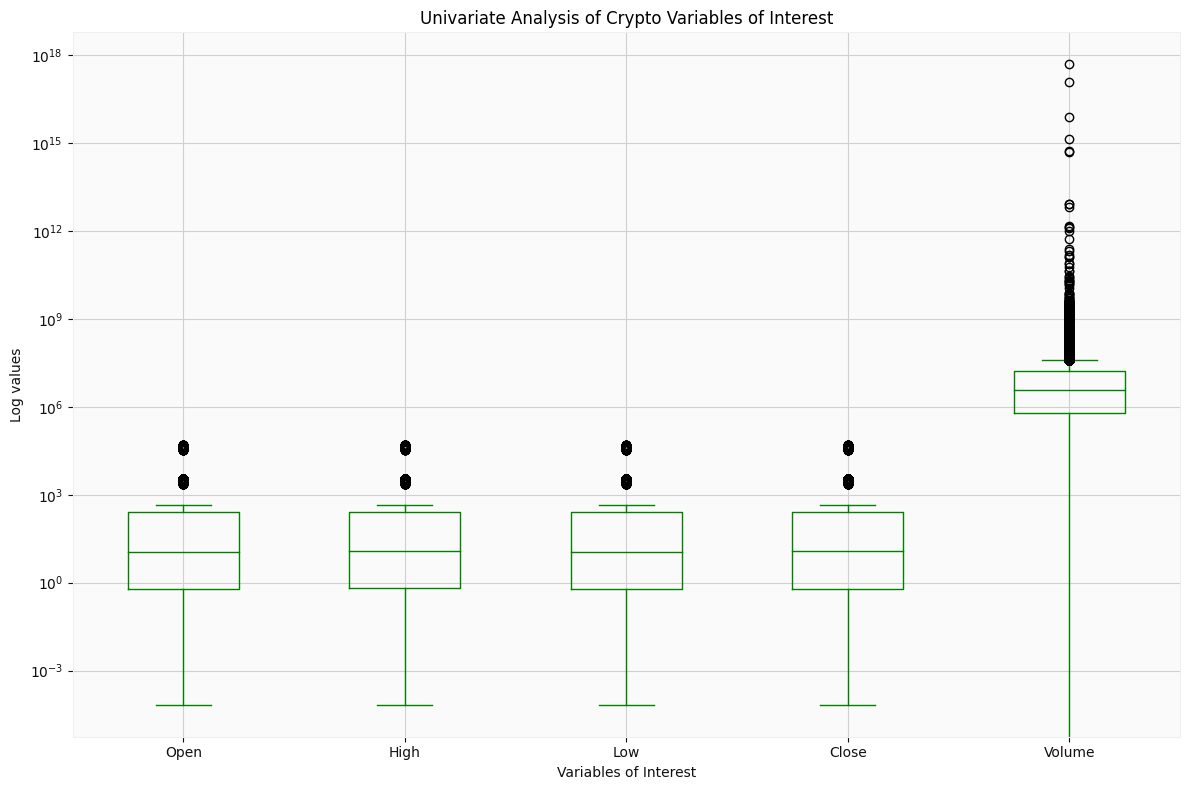

In [42]:
#Data understanding and exploration using visualization technique
# Displaying univariate relationships using boxplot

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"    ]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

print(data.shape)
print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

new_data.boxplot(color='g', figsize=(12,8))

#Calculating the VIF
vif = pd.DataFrame()
vif["Features"] = new_data.columns
vif["VIF"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]
vif.head(4)

plt.yscale("log")
plt.title ("Univariate Analysis of Crypto Variables of Interest")
plt.xlabel("Variables of Interest")
plt.ylabel("Log values")

plt.tight_layout()

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2572\2693909875.py:49: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


(57137, 7)
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object


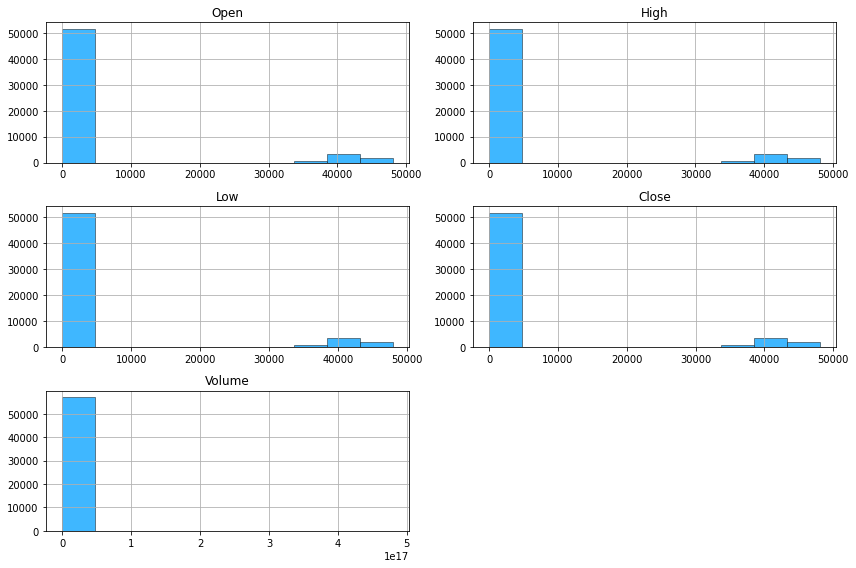

In [33]:
#Data understanding and exploration using visualization technique
# Displaying univariate relationships using histogram

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"    ]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

print(data.shape)
print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

new_data.hist(figsize=(12,8), facecolor='#2ab0ff', edgecolor='k', alpha=0.9, linewidth=0.5)

plt.yscale("log")
plt.title ("Univariate Analysis of Crypto Variables of Interest")
plt.xlabel("Features")
plt.ylabel("Log values")

plt.tight_layout()

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2572\2658292072.py:49: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


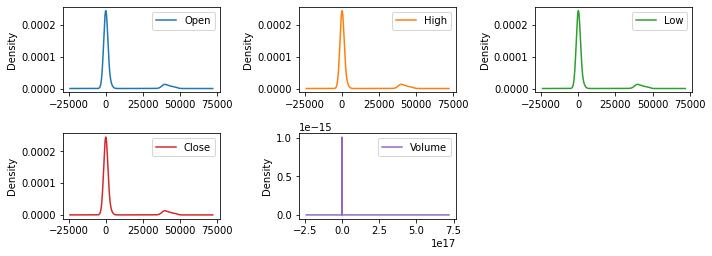

In [37]:
#Data understanding and exploration using visualization technique
# Displaying univariate relationships using density plot

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"    ]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

new_data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize =(10, 5))

plt.yscale("log")
plt.title ("Univariate Analysis of Crypto Variables of Interest")
plt.xlabel("Features")
plt.ylabel("Log values")

plt.tight_layout()

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2572\1721831450.py:49: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


(57157, 7)
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_2572\1721831450.py:97: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


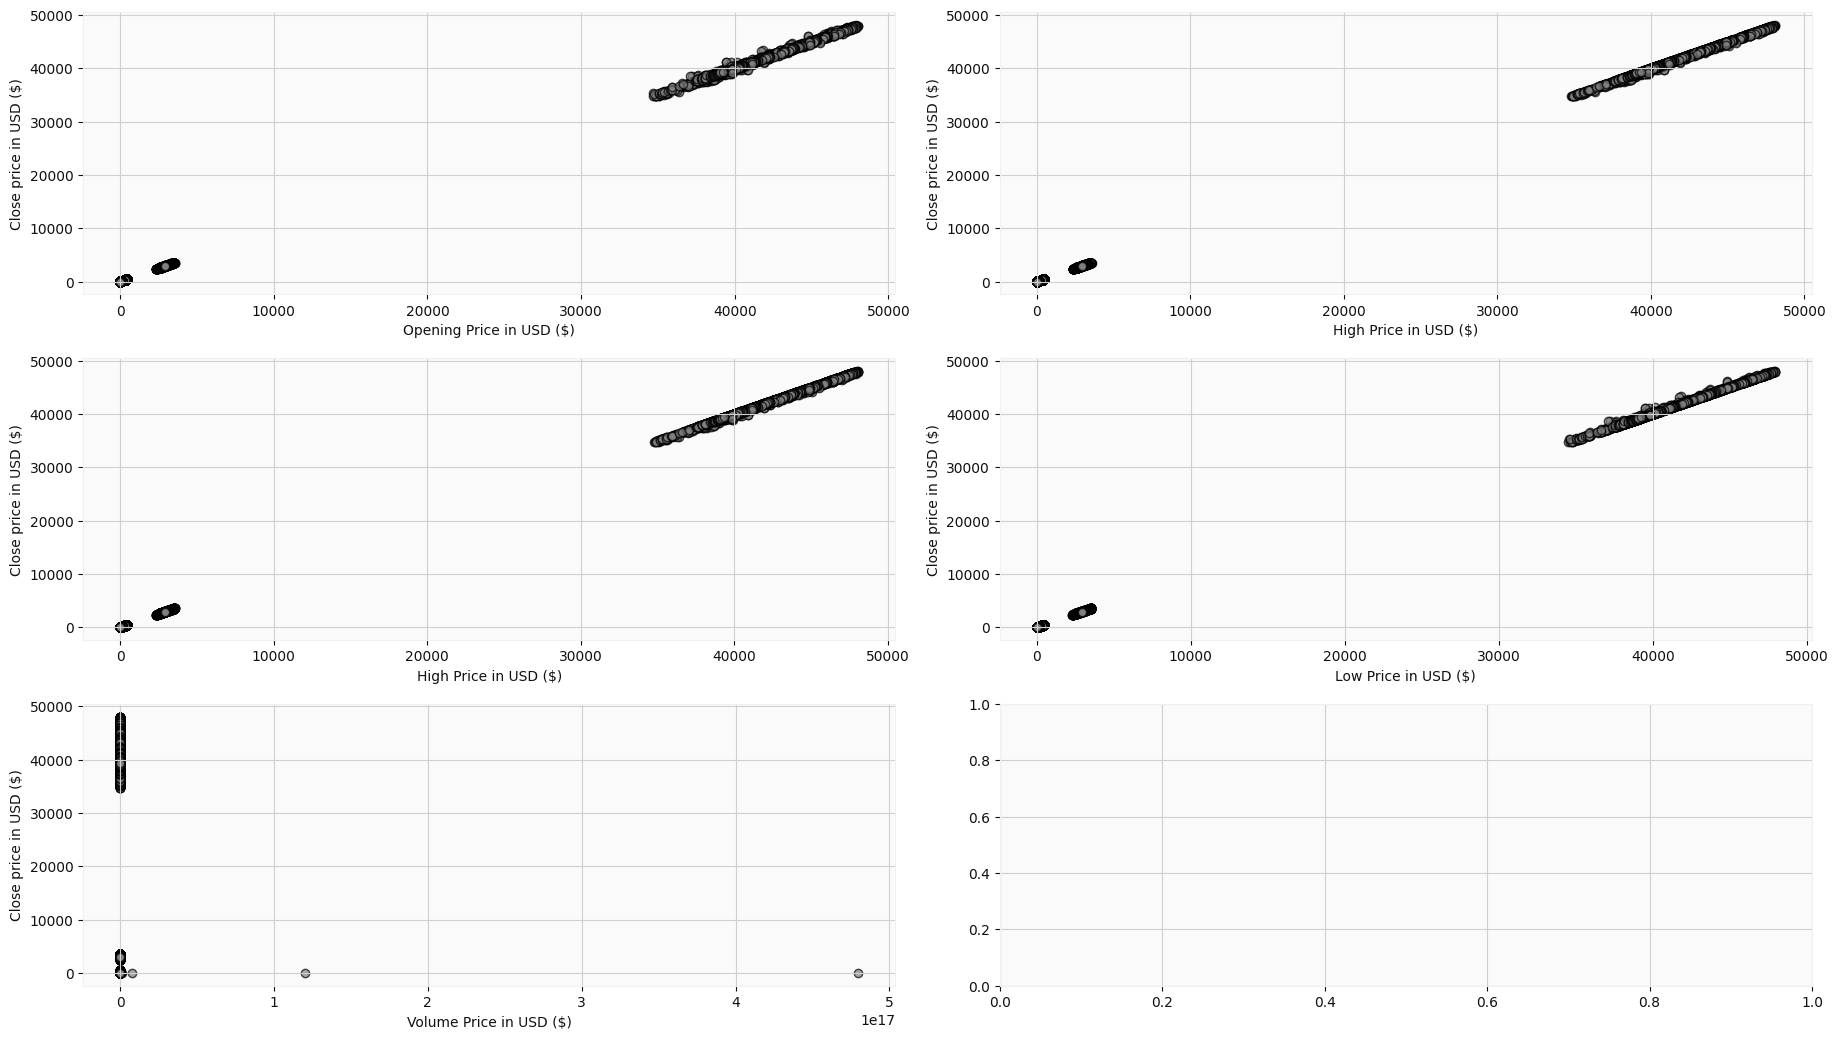

In [40]:
#Data understanding and exploration using visualization technique
# Check of linearity between the features

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"    ]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

print(data.shape)
print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)


fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5, forward=True)

axs[0, 0].scatter(data["Open"], data["Close"], edgecolor='k', facecolor='grey', alpha=0.7)
axs[0, 0].set_xlabel("Opening Price in USD ($)", fontsize =10)
axs[0, 0].set_ylabel("Close price in USD ($)", fontsize =10)

axs[0, 1].scatter(data["High"], data["Close"],edgecolor='k', facecolor='grey', alpha=0.7)
axs[0, 1].set_xlabel("High Price in USD ($)", fontsize =10)
axs[0, 1].set_ylabel("Close price in USD ($)", fontsize =10)

axs[1, 0].scatter(data["High"], data["Close"], edgecolor='k', facecolor='grey', alpha=0.7)
axs[1, 0].set_xlabel("High Price in USD ($)", fontsize =10)
axs[1, 0].set_ylabel("Close price in USD ($)", fontsize =10)


axs[1, 1].scatter(data["Low"], data["Close"], edgecolor='k', facecolor='grey', alpha=0.7)
axs[1, 1].set_xlabel("Low Price in USD ($)", fontsize =10)
axs[1, 1].set_ylabel("Close price in USD ($)", fontsize =10)


axs[2, 0].scatter(data["Volume"], data["Close"], edgecolor='k', facecolor='grey', alpha=0.7)
axs[2, 0].set_xlabel("Volume Price in USD ($)", fontsize =10)
axs[2, 0].set_ylabel("Close price in USD ($)", fontsize =10)


plt.tight_layout()
fig.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_2572\2543222925.py:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


(57137, 7)
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64


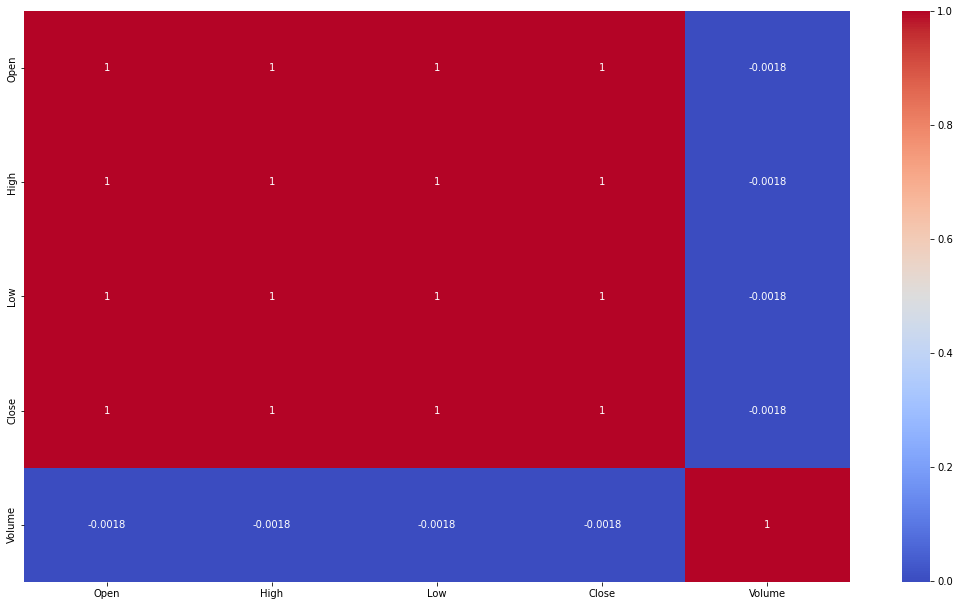

In [28]:
#Data understanding and exploration using visualization technique
# Displaying multivariate relationships using correlation matrix of features
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

print(data.shape)
print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

#Display multivariate analysis using correlation heatmap
#independent variables
X = new_data.iloc[:6]
#dependent variable. i.e crypto price
y = new_data.iloc[:-4]
#get correlation of each variable in the dataset
corrmat = new_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18.5, 10.5))
#plot heatmap
output=sns.heatmap(new_data[top_corr_features].corr(),annot=True,cmap="coolwarm")  #cmap="RdYlGn"
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17344\3784171355.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


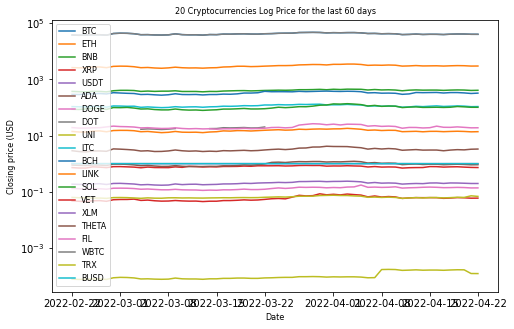

In [8]:
#visualization of the trends of cryptocurrencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import mplfinance as mpf
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import plotly.graph_objects as go
from pandas import set_option

currency ="USD"
target_variable = "Close"

start = dt.datetime(2022, 2,22)
end = dt.datetime.now()


cryptos = ['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD']
col_names= []

first = True

for ticker in cryptos:
    data = pdr.DataReader(f'{ticker}-{currency}', "yahoo", start, end) #Apple Finance API
    set_option("display.width", 100)

    if first:
        combined = data[[target_variable]].copy()
        col_names.append(ticker)
        combined.columns = col_names
        first =False
    else:
        combined = combined.join(data[target_variable])
        col_names.append(ticker)
        combined.columns = col_names

fig = plt.figure(figsize=(8,5))

for ticker in cryptos:
    plt.plot(combined[ticker], label=ticker)
    plt.yscale("log")
    plt.title('20 Cryptocurrencies Log Price for the last 60 days', fontsize =8)
    plt.xlabel('Date', fontsize =8)
    plt.ylabel(f'Closing price ({currency}', fontsize =8)
    plt.legend(cryptos, fontsize =8, loc = 2)

fig.show()


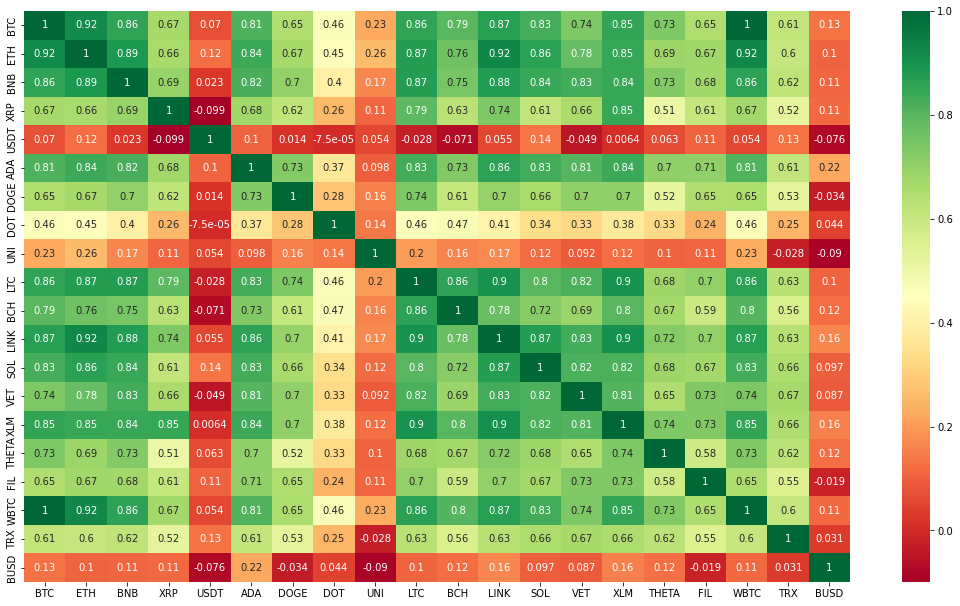

In [12]:
#Display correlation matrix to understand crypto coins multivariate relationship
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import mplfinance as mpf
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import plotly.graph_objects as go
from pandas import set_option

currency ="USD"
target_variable = "Close"

start = dt.datetime(2022, 2,1)
end = dt.datetime.now()


cryptos = ['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD']
col_names= []

# Plotting correlation heatmap
first = True

for ticker in cryptos:
    data = pdr.DataReader(f'{ticker}-{currency}', "yahoo", start, end) #Apple Finance API
    set_option("display.width", 100)

    if first:
        combined = data[[target_variable]].copy()
        col_names.append(ticker)
        combined.columns = col_names
        first =False
    else:
        combined = combined.join(data[target_variable])
        col_names.append(ticker)
        combined.columns = col_names

combined = combined.pct_change().corr(method="pearson")
plt.figure(figsize=(18.5, 10.5))
sns.heatmap(combined, annot=True, cmap="RdYlGn")

plt.show()

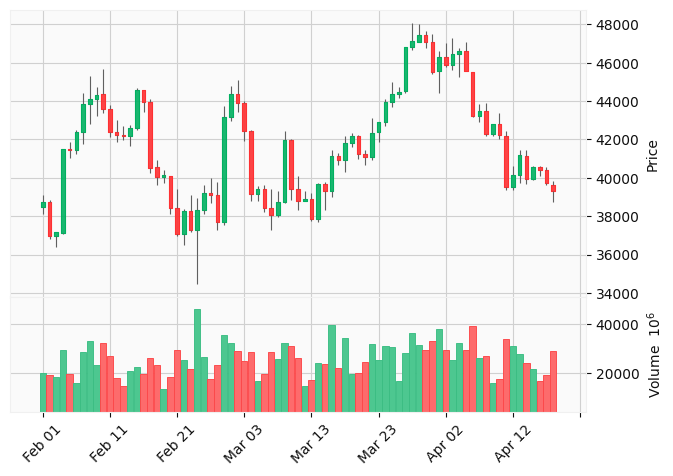

In [60]:
#Data understanding and exploaration: candlestick of Bitcoin closing price and volume
#Display correlation matrix to understand crypto coins multivariate relationship
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as web
import yfinance as yf
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

crypto = "BTC"
currency = "USD"

start = dt.datetime(2022,2,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

mpf.plot(data, type = "candle", style ="yahoo", volume =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2572\599667135.py:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


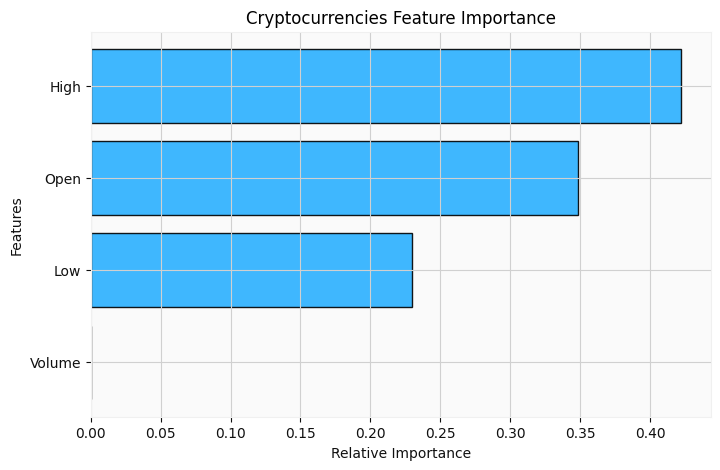

In [46]:
#Data understanding and exploration using visualization technique
# Correlation matrix of features and importance using Random forest classifier

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

#Establising feature importance using Random Forest Classifier

X_data = new_data.drop(["Close"], axis=1)

#declare the RandomForest model
rf_model = RandomForestRegressor(random_state=1, max_depth=4)

#fit the RandomForest model
rf_model.fit(X_data, data.Close, set_printoptions(precision=2))

train_features = X_data.columns
feat_significance = rf_model.feature_importances_

#declaring the top 10 features
indices = np.argsort(feat_significance)[-6:]

#plot graph of feature importance for better visualization
plt.figure(figsize=(8,5))
plt.title ("Cryptocurrencies Feature Importance")
plt.barh(range(len(indices)), feat_significance[indices], align="center", facecolor='#2ab0ff', edgecolor='k', alpha=0.9)
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

In [16]:
#Data preparation and cleaning
# Feature scaling will be done using the min-max scaler. The scaler will be fit on the train dataset and then use
#to transform the test set

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

#performing features scaling using MinMaxScaler
output = preprocessing.MinMaxScaler(feature_range=(0,1))
rescaler_output = output.fit_transform(new_data)

set_printoptions(precision=1)
print("\nScaled data: \n", rescaler_output[0:10])


Scaled data: 
 [[7.7e-01 7.7e-01 7.7e-01 7.7e-01 2.7e-09]
 [7.7e-01 7.8e-01 7.8e-01 7.7e-01 3.1e-09]
 [7.7e-01 7.7e-01 7.7e-01 7.7e-01 0.0e+00]
 [7.7e-01 7.8e-01 7.7e-01 7.8e-01 2.1e-09]
 [7.8e-01 7.8e-01 7.7e-01 7.7e-01 2.5e-10]
 [7.7e-01 7.7e-01 7.7e-01 7.7e-01 1.6e-09]
 [7.7e-01 7.7e-01 7.6e-01 7.6e-01 5.7e-09]
 [7.6e-01 7.6e-01 7.6e-01 7.6e-01 3.1e-09]
 [7.6e-01 7.6e-01 7.6e-01 7.6e-01 2.7e-09]
 [7.6e-01 7.6e-01 7.7e-01 7.6e-01 1.3e-09]]


C:\Users\hp\AppData\Local\Temp\ipykernel_17344\2962609357.py:47: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col_headers] = data[col_headers].applymap(np.float)


In [72]:
#Predicting the price of cryptocurrencies using multiple linear regression model
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
data = pd.concat(df, keys =['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD'])
#print(data.loc['BTC'])

set_option("display.width", 100)

#converting the dataset to float
data[col_headers] = data[col_headers].applymap(np.float)
#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data =data.drop(["Dividends", "Stock Splits"], axis=1)

#Extracting the bitcoin data from the  dataframe:
btc_data = new_data.loc['BTC']

"""
#performing features scaling using MinMaxScaler
output = preprocessing.MinMaxScaler(feature_range=(0,1))
rescaler_output = output.fit_transform(new_data)

set_printoptions(precision=1)
print("\nScaled data: \n", rescaler_output[0:10])

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

train_headers = ["Open", "High", "Low", "Close", "Volume"]
target_header = ["Close"]

#training records = instance(record) 1:39954: corresponding to 0:39953 - 70%
training = df.loc[0:39953]
#validation records = instance(record) 39955:51369: corresponding to 39954:51368 - 20%
validation = df.loc[39954:51368]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:51368]
#testing records = instance(record) 51370:57077: corresponding to 51369:57076 - 10%
testing = df.loc[51369:57076]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])
"""

                                   Open          High           Low         Close        Volume
Datetime                                                                                       
2022-02-22 00:00:00+00:00  37068.769531  37172.835938  36969.589844  37103.890625  3.197768e+08
2022-02-22 00:30:00+00:00  37141.156250  37282.718750  37141.156250  37225.695312  3.691274e+08
2022-02-22 01:00:00+00:00  37233.519531  37247.851562  36986.031250  36986.031250  0.000000e+00
2022-02-22 01:30:00+00:00  36982.210938  37377.808594  36971.480469  37264.777344  2.537738e+08
2022-02-22 02:00:00+00:00  37273.886719  37273.886719  37016.281250  37016.281250  3.003392e+07
...                                 ...           ...           ...           ...           ...
2022-04-22 16:30:00+00:00  39533.335938  39535.402344  39453.457031  39453.457031  1.838715e+09
2022-04-22 17:00:00+00:00  39418.226562  39529.101562  39412.656250  39488.167969  5.798687e+08
2022-04-22 17:30:00+00:00  39475.218750 

'\n#performing features scaling using MinMaxScaler\noutput = preprocessing.MinMaxScaler(feature_range=(0,1))\nrescaler_output = output.fit_transform(new_data)\n\nset_printoptions(precision=1)\nprint("\nScaled data: \n", rescaler_output[0:10])\n\n#fitting the model using the dimensionality reduction datasets\n#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets\n\ntrain_headers = ["Open", "High", "Low", "Close", "Volume"]\ntarget_header = ["Close"]\n\n#training records = instance(record) 1:39954: corresponding to 0:39953 - 70%\ntraining = df.loc[0:39953]\n#validation records = instance(record) 39955:51369: corresponding to 39954:51368 - 20%\nvalidation = df.loc[39954:51368]\n#trainingplusvalidation records: corresponding to 0:2127 - 90%\ntrain_valid = df.loc[0:51368]\n#testing records = instance(record) 51370:57077: corresponding to 51369:57076 - 10%\ntesting = df.loc[51369:57076]\n\n#separating the outcome variable from the input Dataf

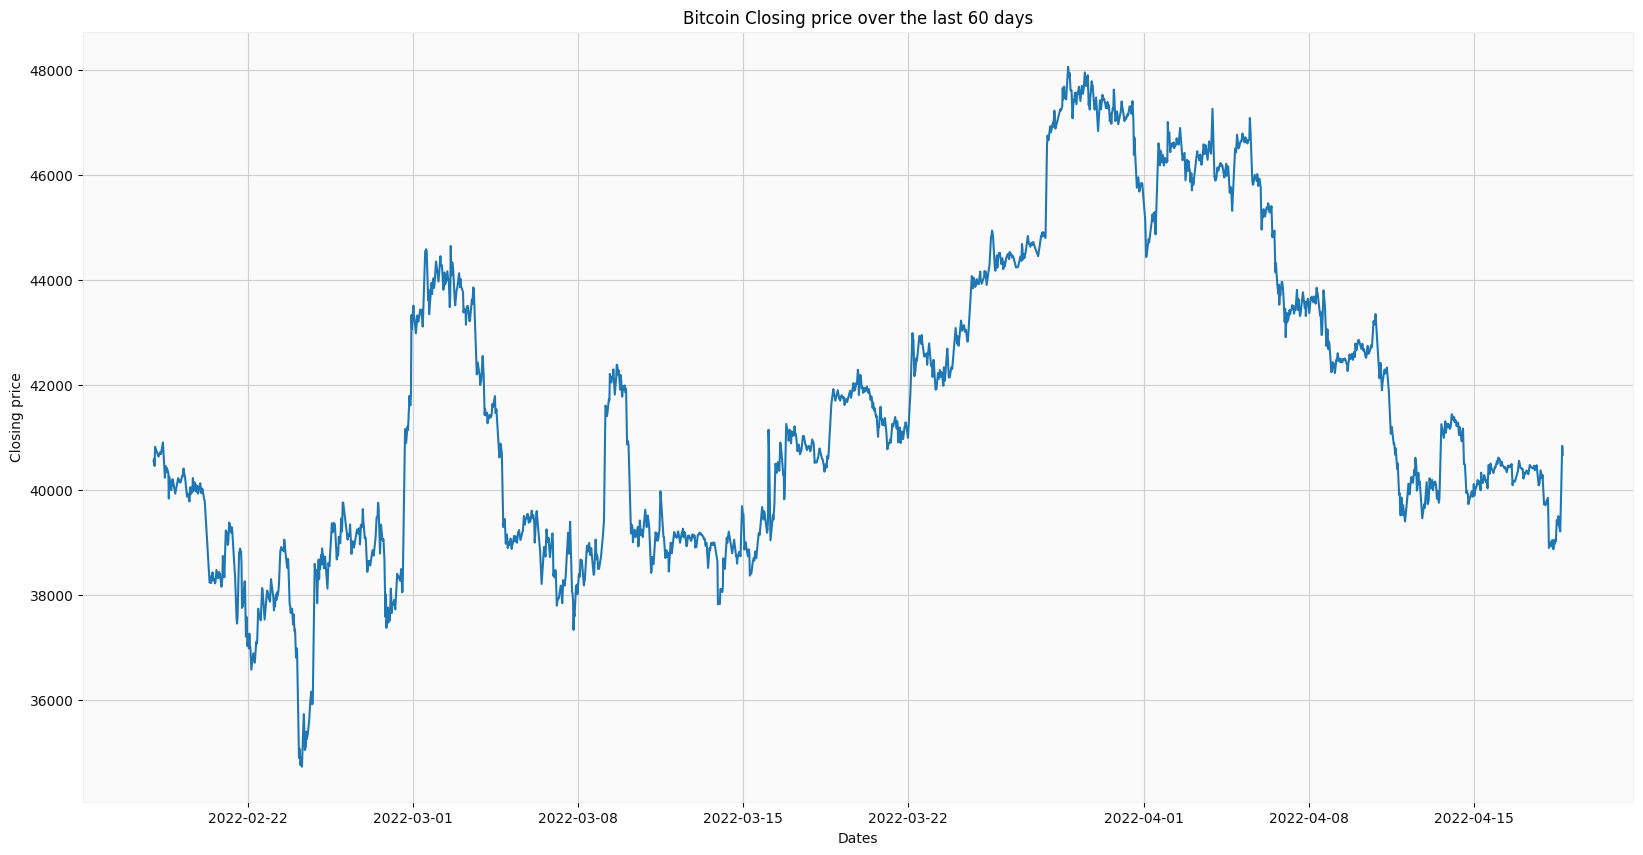

In [109]:
#Predicting of bitcoin price using ARIMA model
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

# Displaying bitcoin closing price over the last 60 days
df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df_btc =df1.drop(["Dividends", "Stock Splits"], axis=1)

plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing price")
plt.plot(df_btc.index, df_btc["Close"])
plt.title("Bitcoin Closing price over the last 60 days")

plt.show()




Training data
 Datetime
2022-02-18 00:00:00+00:00    40552.390625
2022-02-18 00:30:00+00:00    40595.695312
2022-02-18 01:00:00+00:00    40458.542969
2022-02-18 01:30:00+00:00    40820.191406
2022-02-18 02:00:00+00:00    40790.828125
Freq: 30T, Name: Close, dtype: float64

Testing data
 Datetime
2022-04-06 20:00:00+00:00    43896.589844
2022-04-06 20:30:00+00:00    43961.515625
2022-04-06 21:00:00+00:00    43955.902344
2022-04-06 21:30:00+00:00    43899.363281
2022-04-06 22:00:00+00:00    43760.046875
Freq: 30T, Name: Close, dtype: float64


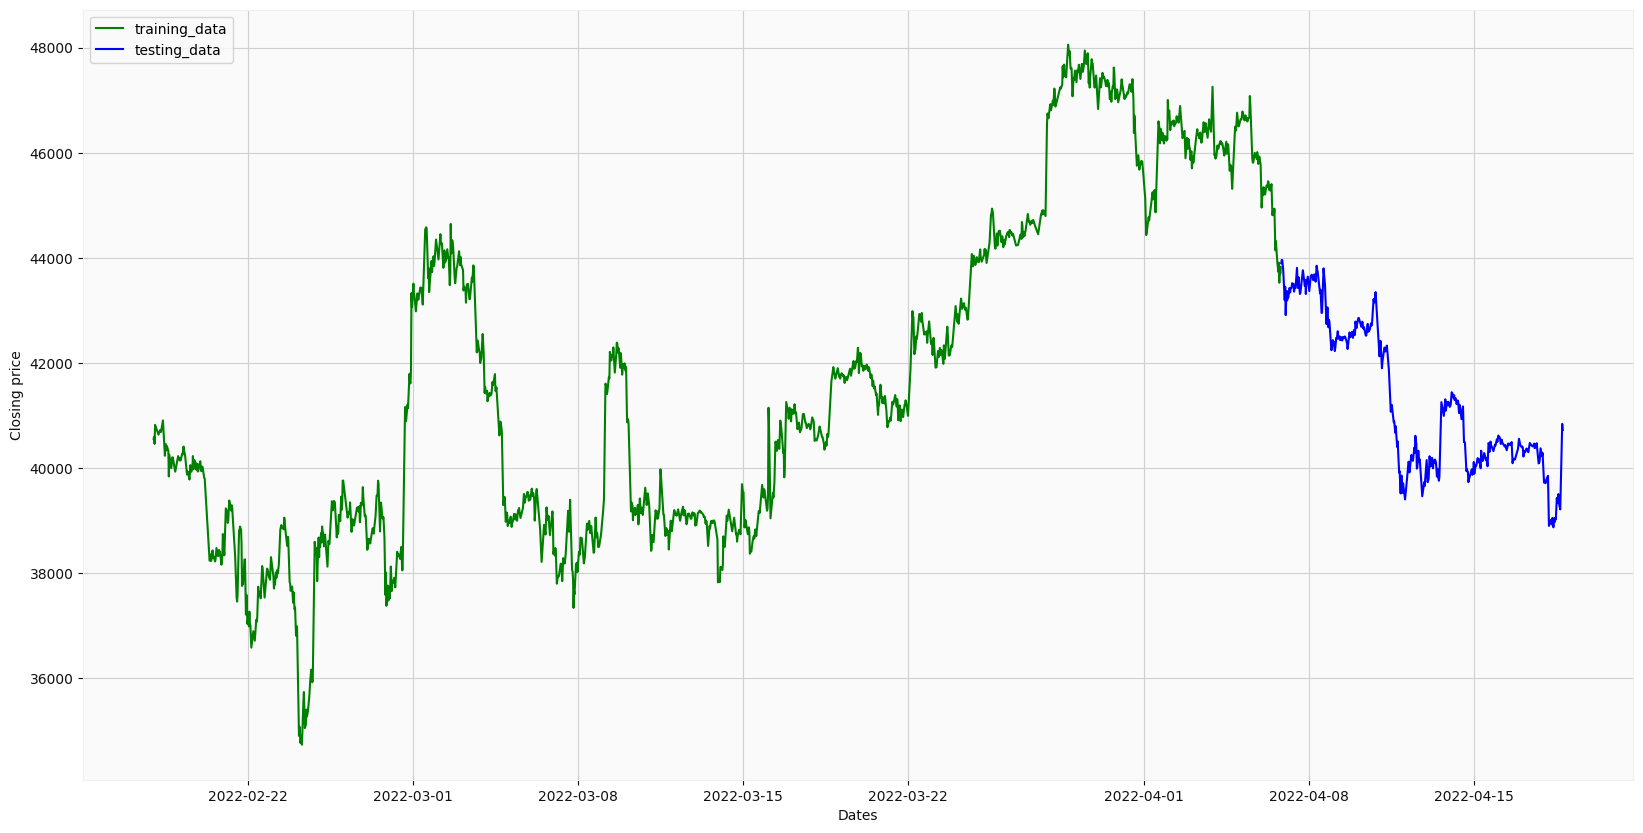

In [108]:
#Predicting of bitcoin price using ARIMA model
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

# Predicting Bitcoin closing price with ARIMA model
df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df_btc =df1.drop(["Dividends", "Stock Splits"], axis=1)

#Declaring train_test split
train_split= int(len(df_btc)*0.80)
training_data = df_btc[0:train_split]["Close"]
testing_data = df_btc[train_split:]["Close"]
print("\nTraining data\n", training_data.head(n=5))
print("\nTesting data\n", testing_data.head(n=5))

#Displaying training and testing set
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing price")
plt.plot(df_btc[0:train_split]["Close"], "green", label ="training_data")
plt.plot(df_btc[train_split:]["Close"], "blue", label ="testing_data" )
plt.legend(loc =2)

In [51]:
#Predicting of bitcoin price using ARIMA model
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

# Predicting Bitcoin closing price with ARIMA model
df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df_btc =df1.drop(["Dividends", "Stock Splits"], axis=1)

#train_test split
train_split= int(len(df_btc)*0.80)
training_data = pd.DataFrame(df_btc[0:train_split]["Close"])
testing_data = pd.DataFrame(df_btc[train_split:]["Close"])
#print("\nTraining data\n", training_data.head(n=5))
#print("\nTesting data\n", testing_data.head(n=5))

#instantiating the ARIMA model
model_prediction =[]
test_sample = len(testing_data)
for i in range(test_sample):
    model_arima = sm.tsa.arima.ARIMA(training_data, order =(4, 1, 0)) # order is p,d, q
    model_fit = model_arima.fit()
    predictions = model_fit.forecast()
    #print(predictions)
    #break
    y_value = pd.DataFrame(predictions)
    model_prediction.append(y_value)
    update_train_test = pd.concat((training_data, testing_data))


In [23]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2295
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -15194.866
Date:                Tue, 19 Apr 2022   AIC                          30399.732
Time:                        19:31:41   BIC                          30428.422
Sample:                    02-19-2022   HQIC                         30410.193
                         - 04-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0913      0.014      6.726      0.000       0.065       0.118
ar.L2          0.0065      0.013      0.504      0.614      -0.019       0.032
ar.L3         -0.0013      0.016     -0.082      0.9

In [52]:
print(len(model_prediction))
print(len(testing_data))
#print(model_prediction)
print(testing_data)

574
574
                                  Close
Datetime                               
2022-04-07 20:00:00+00:00  43463.695312
2022-04-07 20:30:00+00:00  43580.246094
2022-04-07 21:00:00+00:00  43311.390625
2022-04-07 21:30:00+00:00  43496.421875
2022-04-07 22:00:00+00:00  43570.773438
...                                 ...
2022-04-19 16:30:00+00:00  41353.273438
2022-04-19 17:00:00+00:00  41259.828125
2022-04-19 17:30:00+00:00  41331.941406
2022-04-19 18:00:00+00:00  41380.195312
2022-04-19 18:30:00+00:00  41394.906250

[574 rows x 1 columns]


TypeError: list indices must be integers or slices, not tuple

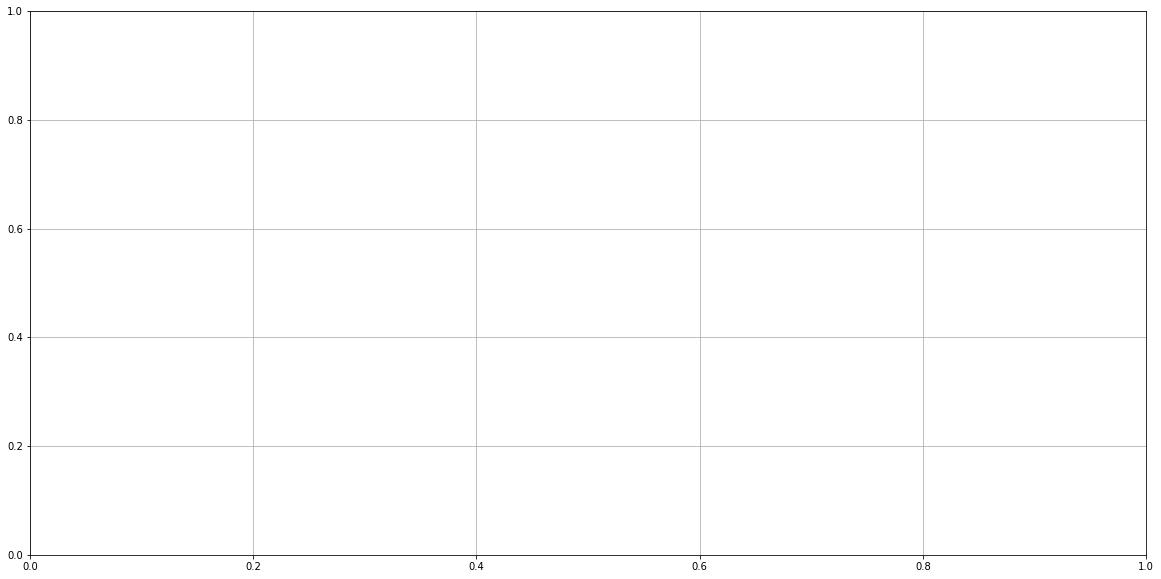

In [6]:
#Displaying the actual y_test and the predictions

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df)
set_option("display.width", 100)

#converting the dataset to float

data[col_headers] = data[col_headers].applymap(np.float)

#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data= data.drop(["Dividends", "Stock Splits"], axis=1)

# Predicting Bitcoin closing price with ARIMA model
df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df_btc =df1.drop(["Dividends", "Stock Splits"], axis=1)

#train_test split
train_split= int(len(df_btc)*0.80)
training_data = pd.DataFrame(df_btc[0:train_split]["Close"])
testing_data = pd.DataFrame(df_btc[train_split:]["Close"])
#print("\nTraining data\n", training_data.head(n=5))
#print("\nTesting data\n", testing_data.head(n=5))

#instantiating the ARIMA model
model_prediction =[]
test_sample = len(testing_data)
for i in range(test_sample):
    model_arima = sm.tsa.arima.ARIMA(training_data, order =(4, 1, 0)) # order is p,d, q
    model_fit = model_arima.fit()
    predictions = model_fit.forecast()
    #print(predictions)
    #break
    y_value = pd.DataFrame(predictions)
    model_prediction.append(y_value)
    update_train_test = pd.concat((training_data, testing_data))

plt.figure(figsize=(20,10))
plt.grid(True)

data_interval = df_btc[train_split:].index
plt.plot(data_interval, model_prediction[:,0:0], color ='blue', marker ='o', linestyle ='dashed', label ='BTC predicted price')
plt.plot(data_interval, testing_data, color ='red', label ='BTC actual price' )

plt.title("Bitcoin Price Predictions")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.legend(loc =1)

plt.show()

In [ ]:
# Display performance metrics

mape = np.mean(np.abs(np.array(model_prediction[-1]) - np.array(testing_data))/np.abs(testing_data))
print("MAPE: ", +str(mape))

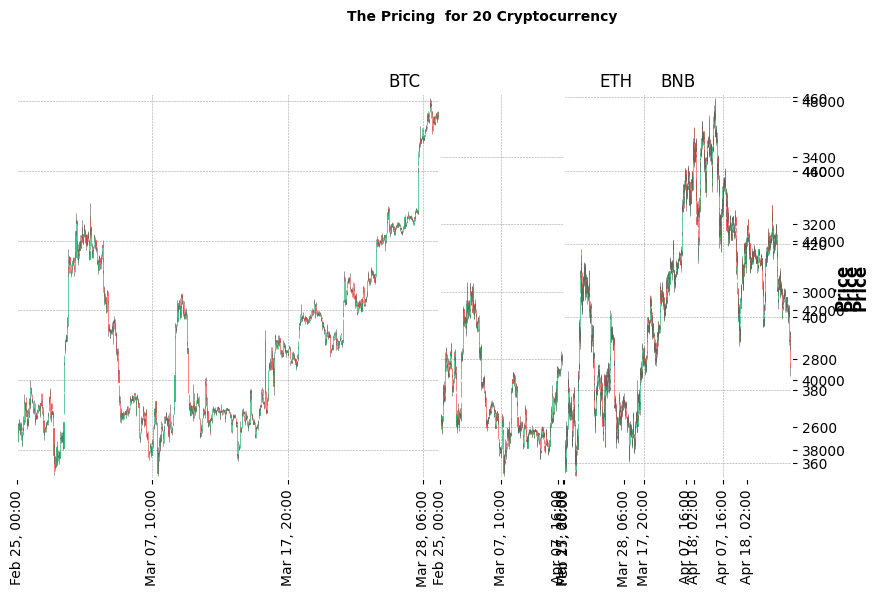

In [1]:
# Predicting of bitcoin price using Long Short-term Memory (LSTM) Network
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df, keys =['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD'])
#print(data.loc['BTC'])

set_option("display.width", 100)

#converting the dataset to float
data[col_headers] = data[col_headers].applymap(np.float)
#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data =data.drop(["Dividends", "Stock Splits"], axis=1)
#print(new_data.shape)

#extracting data for each crypto coin
btc = new_data.loc['BTC']
eth = new_data.loc['ETH']
bnb= new_data.loc['BNB']
xrp = new_data.loc['XRP']
usdt =new_data.loc['USDT']
ada = new_data.loc['ADA']
doge = new_data.loc['DOGE']
dot = new_data.loc['DOT']
uni = new_data.loc['UNI']
ltc = new_data.loc['LTC']
bch = new_data.loc['BCH']
link = new_data.loc['LINK']
sol = new_data.loc['SOL']
vet = new_data.loc['VET']
xlm = new_data.loc['XLM']
theta= new_data.loc['THETA']
fil = new_data.loc['FIL']
wbtc = new_data.loc['WBTC']
trx = new_data.loc['TRX']
busd = new_data.loc['BUSD']


# visualizing 20 cryptocoins pricing after extracting its dataset
fig = mpf.figure(style='charles', figsize=(10,5))
#fig.patch.set_facecolor('black')
fig.suptitle('The Pricing  for 20 Cryptocurrency', fontsize=10, y=1.05, x=0.59)
#fig.subplots_adjust(hspace=0.3)
ax1 = fig.add_subplot(1,1,1) # 1=row, 1= column, 1 = position
ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(1,3,3)

mpf.plot(btc, type='candle', style ="yahoo", ax=ax1, axtitle='BTC', xrotation=90, tight_layout=True)
mpf.plot(eth, type='candle', style ="yahoo", ax=ax2, axtitle='ETH', xrotation=90, tight_layout=True)
mpf.plot(bnb, type='candle', style ="yahoo", ax=ax3, axtitle='BNB', xrotation=90, tight_layout=True)
#ax1.set_xticklabels([])
#ax2.set_xticklabels([])

fig.show()

Epoch 1/25
87/87 [==============================] - 29s 119ms/step - loss: 0.0223
Epoch 2/25
87/87 [==============================] - 8s 96ms/step - loss: 0.0112
Epoch 3/25
87/87 [==============================] - 10s 112ms/step - loss: 0.0110
Epoch 4/25
87/87 [==============================] - 11s 126ms/step - loss: 0.0108
Epoch 5/25
87/87 [==============================] - 10s 115ms/step - loss: 0.0104
Epoch 6/25
87/87 [==============================] - 11s 121ms/step - loss: 0.0105
Epoch 7/25
87/87 [==============================] - 10s 115ms/step - loss: 0.0098
Epoch 8/25
87/87 [==============================] - 11s 123ms/step - loss: 0.0096
Epoch 9/25
87/87 [==============================] - 10s 113ms/step - loss: 0.0098
Epoch 10/25
87/87 [==============================] - 10s 118ms/step - loss: 0.0094
Epoch 11/25
87/87 [==============================] - 9s 105ms/step - loss: 0.0091
Epoch 12/25
87/87 [==============================] - 10s 109ms/step - loss: 0.0098
Epoch 13/25
87/8

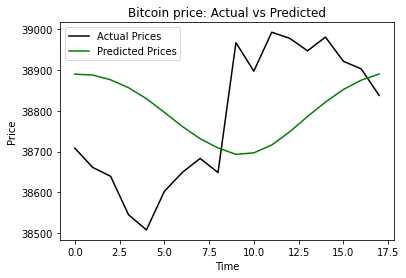

<Figure size 1080x576 with 0 Axes>

'\n#testing the Model: making prediction for the next day\nreal_data = [model_data_valid[len(model_data_valid) + 1 - prediction_days:len(model_data_valid)+1, 0]]\nreal_data = np.array(real_data)\nreal_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))\n\npredictions = model.predict(real_data)\npredicted_prices = scaling.inverse_transform(real_data)\n#print(predicted_prices)\n'

In [2]:
# Predicting of bitcoin price using Long Short-term Memory (LSTM) Network
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
import pandas_datareader as pdr
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df, keys =['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD'])


#print(data.loc['BTC'])

set_option("display.width", 100)

#converting the dataset to float
data[col_headers] = data[col_headers].applymap(np.float)
#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data =data.drop(["Dividends", "Stock Splits"], axis=1)
#print(new_data.shape)

#extracting data for each crypto coin
btc = new_data.loc['BTC']
eth = new_data.loc['ETH']
bnb= new_data.loc['BNB']
xrp = new_data.loc['XRP']
usdt =new_data.loc['USDT']
ada = new_data.loc['ADA']
doge = new_data.loc['DOGE']
dot = new_data.loc['DOT']
uni = new_data.loc['UNI']
ltc = new_data.loc['LTC']
bch = new_data.loc['BCH']
link = new_data.loc['LINK']
sol = new_data.loc['SOL']
vet = new_data.loc['VET']
xlm = new_data.loc['XLM']
theta= new_data.loc['THETA']
fil = new_data.loc['FIL']
wbtc = new_data.loc['WBTC']
trx = new_data.loc['TRX']
busd = new_data.loc['BUSD']

# Preprocessing of data for machine learning using MinMax scaler

scaling = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_data = scaling.fit_transform(btc[['Close']]).reshape(-1,1)
#print(scaled_data)

#transform the data into X and y

prediction_days = 60 #This is same as X_window: past day to predict the next day price
future_day = 30

X_train, y_train = [], []

for x in range(prediction_days, len(scaled_data) - future_day): # future day
    X_train.append(scaled_data[x-prediction_days: x,0])
    y_train.append(scaled_data[x+future_day, 0]) #x+future day

#print(X_train)
#print(y_train)

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


#Instantiate the neural network
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2)) #to prevent overfitting
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units =1)) # That is, one unit of the price prediction itself to avoid multiple unit

model.compile(optimizer ='adam', loss ='mean_squared_error')
model.fit(X_train, y_train, epochs = 25, batch_size = 32) #built and train model

# Validating the model
df1 = yf.Ticker("BTC-USD").history(period ="1d", interval = "30m")
#print(valid_df1)
df2 = yf.Ticker("ETH-USD").history(period ="1d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="1d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="1d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="1d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="1d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="1d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="1d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="1d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="1d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="1d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="1d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="1d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="1d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="1d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="1d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="1d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="1d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="1d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="1d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
data = pd.concat(df, keys =['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD'])


#print(data.loc['BTC'])

set_option("display.width", 100)

#converting the dataset to float
data[col_headers] = data[col_headers].applymap(np.float)
#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data =data.drop(["Dividends", "Stock Splits"], axis=1)
#print(new_data.shape)

#extracting data for each crypto coin
X_valid_btc = new_data.loc['BTC']
eth = new_data.loc['ETH']
bnb= new_data.loc['BNB']
xrp = new_data.loc['XRP']
usdt =new_data.loc['USDT']
ada = new_data.loc['ADA']
doge = new_data.loc['DOGE']
dot = new_data.loc['DOT']
uni = new_data.loc['UNI']
ltc = new_data.loc['LTC']
bch = new_data.loc['BCH']
link = new_data.loc['LINK']
sol = new_data.loc['SOL']
vet = new_data.loc['VET']
xlm = new_data.loc['XLM']
theta= new_data.loc['THETA']
fil = new_data.loc['FIL']
wbtc = new_data.loc['WBTC']
trx = new_data.loc['TRX']
busd = new_data.loc['BUSD']

y_valid = X_valid_btc['Close'].values
total_data = pd.concat((btc['Close'], X_valid_btc['Close']), axis =0) #axis =0 by default

model_data = total_data[len(total_data) - len(X_valid_btc)-prediction_days:].values
model_data = model_data.reshape(-1,1)
model_data_valid = scaling.fit_transform(model_data)

#creating the X and y training set for the validation data

X_valid= []

for x in range(prediction_days, len(model_data_valid)):
    X_valid.append(model_data_valid[x-prediction_days:x,0])

X_valid = np.array(X_valid)
#print(X_valid)

X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

predictions = model.predict(X_valid)
predicted_prices = scaling.inverse_transform(predictions)

plt.plot(y_valid, color ='black', label='Actual Prices')
plt.plot(predicted_prices, color ='green', label='Predicted Prices')
plt.title('Bitcoin price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel ('Price')
plt.legend(loc =2) #upper left
plt.figure(figsize = (15,8))
plt.show()

"""
#testing the Model: making prediction for the next day
real_data = [model_data_valid[len(model_data_valid) + 1 - prediction_days:len(model_data_valid)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

predictions = model.predict(real_data)
predicted_prices = scaling.inverse_transform(real_data)
#print(predicted_prices)
"""

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.053e+06
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:31:30   Log-Likelihood:                -10652.
No. Observations:                2008   AIC:                         2.131e+04
Df Residuals:                    2004   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.2871     16.976     -0.842      0.4

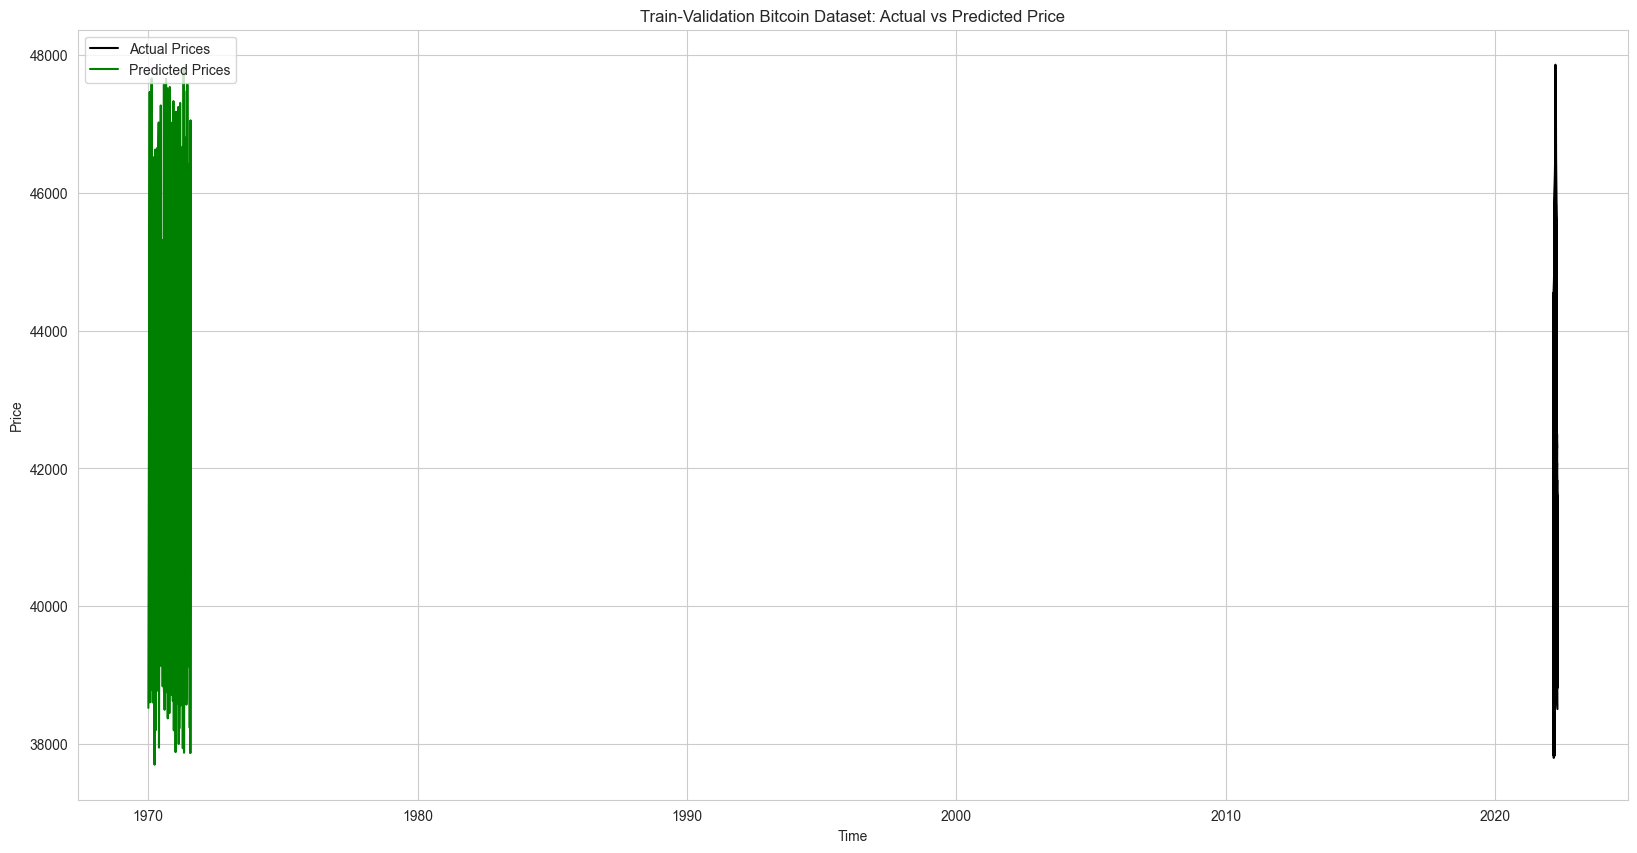

'\n# visualizing 20 cryptocoins pricing after extracting its dataset\nfig = mpf.figure(style=\'yahoo\', figsize=(10,5))\nfig.suptitle("Train-Validation Bitcoin Dataset: Actual vs Predicted Price", fontsize=10, y=1.05, x=0.59)\n\nmpf.plot(df1, type=\'candle\', style ="yahoo", xrotation=90, tight_layout=True)\nmpf.plot(df2, type=\'candle\', style ="yahoo", xrotation=90, tight_layout=True)\n\nfig.show()\n\n'

In [22]:
#Predicting cryptocurrency price using multiple linear regression
import pandas as pd
import numpy as np
import datetime as dt
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from scipy.stats import probplot
from fast_ml.model_development import train_valid_test_split
sns.set_style("whitegrid")
import warnings
#warnings library is imported to stop warnings from showing up as they do not provide added insights into statistical analysis
warnings.filterwarnings('ignore')

df1 = yf.Ticker("BTC-USD").history(period ="60d", interval = "30m")
df2 = yf.Ticker("ETH-USD").history(period ="60d", interval = "30m")
df3 = yf.Ticker("BNB-USD").history(period ="60d", interval = "30m")
df4 = yf.Ticker("XRP-USD").history(period ="60d", interval = "30m")
df5 = yf.Ticker("USDT-USD").history(period ="60d", interval = "30m")
df6 = yf.Ticker("ADA-USD").history(period ="60d", interval = "30m")
df7 = yf.Ticker("DOGE-USD").history(period ="60d", interval = "30m")
df8 = yf.Ticker("DOT-USD").history(period ="60d", interval = "30m")
df9 = yf.Ticker("UNI-USD").history(period ="60d", interval = "30m")
df10 = yf.Ticker("LTC-USD").history(period ="60d", interval = "30m")
df11 = yf.Ticker("BCH-USD").history(period ="60d", interval = "30m")
df12 = yf.Ticker("LINK-USD").history(period ="60d", interval = "30m")
df13 = yf.Ticker("SOL-USD").history(period ="60d", interval = "30m")
df14 = yf.Ticker("VET-USD").history(period ="60d", interval = "30m")
df15 = yf.Ticker("XLM-USD").history(period ="60d", interval = "30m")
df16 = yf.Ticker("THETA-USD").history(period ="60d", interval = "30m")
df17 = yf.Ticker("FIL-USD").history(period ="60d", interval = "30m")
df18 = yf.Ticker("WBTC-USD").history(period ="60d", interval = "30m")
df19 = yf.Ticker("TRX-USD").history(period ="60d", interval = "30m")
df20 = yf.Ticker("BUSD-USD").history(period ="60d", interval = "30m")

df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
col_headers = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
keys =['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD']

data = pd.concat(df,keys=keys)

#print(data.loc['BTC'])

set_option("display.width", 100)

#converting the dataset to float
data[col_headers] = data[col_headers].applymap(np.float)
#print(data.shape)
#print(data.dtypes)

#force all the non-numeric value and error to NAN(a recognized null value)
data["Dividends"] = pd.to_numeric(data["Dividends"], errors ="coerce")
data["Stock Splits"] = pd.to_numeric(data["Stock Splits"], errors ="coerce")

#checking for missing value ratio

blank_value_data = data[data.isna().any(axis=1)]
#print(blank_value_data)

#get the percentage of missing value by variables
ratio_missing = data.isnull().median()*100
#print(ratio_missing)

new_data =data.drop(["Volume", "Dividends", "Stock Splits"], axis=1)
#print(new_data.shape)

#extracting data for each crypto coin
btc = new_data.loc['BTC']
eth = new_data.loc['ETH']
bnb= new_data.loc['BNB']
xrp = new_data.loc['XRP']
usdt =new_data.loc['USDT']
ada = new_data.loc['ADA']
doge = new_data.loc['DOGE']
dot = new_data.loc['DOT']
uni = new_data.loc['UNI']
ltc = new_data.loc['LTC']
bch = new_data.loc['BCH']
link = new_data.loc['LINK']
sol = new_data.loc['SOL']
vet = new_data.loc['VET']
xlm = new_data.loc['XLM']
theta= new_data.loc['THETA']
fil = new_data.loc['FIL']
wbtc = new_data.loc['WBTC']
trx = new_data.loc['TRX']
busd = new_data.loc['BUSD']

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

train_headers = ["Open", "High", "Low"]
target_header = ["Close"]

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(btc, target = "Close",
                                                                            train_size =0.70,
                                                                            valid_size = 0.20,
                                                                            test_size =0.10)


#print(len(btc))
#print("\nThis is training:", X_train)
#print("\nThis is validation:", X_valid)
#print("\nThis is testing:", X_test)
#print("\nFull data\n", btc)

#btc.to_csv("btc.csv", index = False)


#initialise the linear regression model
lr_regression = LinearRegression()
#fit and train the regression model
lr_regression.fit(X_train, y_train)

#refit the model with stats model to produce the coefficients and intercept
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
X2 = sm.add_constant(X_train)

est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

#using the trained model to predict the y_values for the records in the validation dataset
y_pred_valid = lr_regression.predict(X_valid)
y_pred_train = lr_regression.predict(X_train)
#print("\nPredicted y_values for the validation dataset\n", y_pred_valid)

# create a Dataframe to see the predicted and the actual y_values side-by-side
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_valid})
df1 = pd.DataFrame(y_valid)
df2 = pd.DataFrame(y_pred_valid)
print(df.sort_index())

#evaluation/checking the quality of the regression model of the model based on the success metrics
mae_tb = mean_absolute_error(y_valid, y_pred_valid)
mse_tb = mean_squared_error(y_valid, y_pred_valid)
rmse_tb = np.sqrt(mse_tb)
r2_valid = r2_score(y_valid, y_pred_valid)

#display r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#display the model evaluation parameters values
print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score for validation dataset: {:.4} ".format(r2_valid))
print("R2 score for train dataset: {:.4} ".format(r2_train))

#Visualize the actual closing price and the predicted based on the validation dataset

plt.figure(figsize=(20,10))
plt.grid(True)

plt.plot(y_valid, color ='black', label='Actual Prices')
plt.plot(y_pred_valid, color ='green', label='Predicted Prices')
plt.title('Train-Validation Bitcoin Dataset: Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel ('Price')
plt.legend(loc =2) #upper left
plt.show()

"""
# visualizing 20 cryptocoins pricing after extracting its dataset
fig = mpf.figure(style='yahoo', figsize=(10,5))
fig.suptitle("Train-Validation Bitcoin Dataset: Actual vs Predicted Price", fontsize=10, y=1.05, x=0.59)

mpf.plot(df1, type='candle', style ="yahoo", xrotation=90, tight_layout=True)
mpf.plot(df2, type='candle', style ="yahoo", xrotation=90, tight_layout=True)

fig.show()

"""

In [30]:
#visualization of the trends of cryptocurrencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import mplfinance as mpf
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import plotly.graph_objects as go
from pandas import set_option

currency ="USD"
features = "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"

start = dt.datetime(2022, 1,1)
end = dt.datetime.now()


cryptos = ['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'ADA', 'DOGE', 'DOT', 'UNI', 'LTC', 'BCH', 'LINK', 'SOL', 'VET', 'XLM', 'THETA', 'FIL', 'WBTC', 'TRX', 'BUSD']
col_names= []

first = True

for ticker in cryptos:
    data = pdr.DataReader(f'{ticker}-{currency}', "yahoo", start, end) #Apple Finance API
    col_names.append(data)

print(data)



                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2022-01-01  1.001435  0.998494  1.000777  1.000517  2762196945   1.000517
2022-01-02  1.001512  0.998461  1.000505  0.999464  2793373261   0.999464
2022-01-03  1.001491  0.998262  0.999480  0.999266  3583557288   0.999266
2022-01-04  1.001545  0.998125  0.999282  0.999152  3886337997   0.999152
2022-01-05  1.001491  0.998530  0.999189  1.001074  5141542084   1.001074
...              ...       ...       ...       ...         ...        ...
2022-04-21  1.002008  0.998342  1.000721  1.000500  4791525318   1.000500
2022-04-22  1.001626  0.998193  1.000479  0.999258  4330053781   0.999258
2022-04-23  1.001794  0.998525  0.999293  0.998668  2556278555   0.998668
2022-04-24  1.001544  0.998055  0.998616  1.000397  2615953094   1.000397
2022-04-25  1.001666  0.997918  1.000309  0.999760  4530378752   0.999760

[115 rows x 6 columns]
